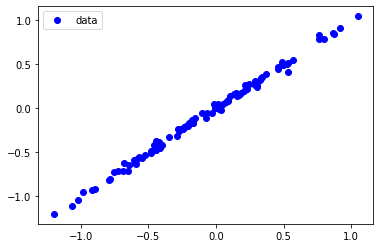

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# python3 이상에서는 xrange 대신 range 사용해야 합니다.

num_points = 1000
vectors_set = []

for i in range(num_points):
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])
    
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

plt.plot(x_data, y_data, 'bo', label='data')
plt.legend()
plt.show()

In [36]:
import tensorflow as tf

w = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = w*x_data + b

In [42]:
# cost function(label - estimate_value)
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [43]:
# 변수 초기화
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

In [44]:
# W와 b를 찾기 위해 반복적인 Train
for step in range(10):
    sess.run(train)
    print (step, sess.run(w), sess.run(b), sess.run(loss))

0 [0.83159566] [-0.01718911] 0.0074424674
1 [0.87095344] [-0.01325347] 0.0046877414
2 [0.90090656] [-0.01037871] 0.0030934573
3 [0.9236935] [-0.00819088] 0.0021707667
4 [0.9410288] [-0.00652649] 0.0016367588
5 [0.9542167] [-0.00526029] 0.0013277015
6 [0.96424955] [-0.00429702] 0.0011488337
7 [0.9718821] [-0.0035642] 0.0010453142
8 [0.9776886] [-0.00300671] 0.0009854021
9 [0.982106] [-0.00258259] 0.0009507278


No handles with labels found to put in legend.


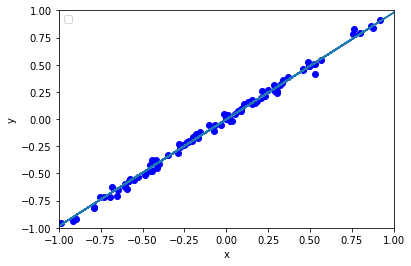

In [46]:
# 결과 그림으로 표현
plt.plot(x_data, y_data, 'bo', label='train result')
plt.plot(x_data, sess.run(w)*x_data + sess.run(b))
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-2, 2)
plt.ylim(0.1, 0.6)
plt.show()